## Creacion de Modelo logistico para el PIB futuro de México

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from scipy.optimize import curve_fit

df = pd.read_excel("Mexico GDP.xlsx")
df

,Periodo,GDP
0,1960,1.304000e+10
1,1961,1.416000e+10
2,1962,1.520000e+10
3,1963,1.696000e+10
4,1964,2.008000e+10
...,...,...
57,2017,1.158913e+12
58,2018,1.222408e+12
59,2019,1.269404e+12
60,2020,1.087118e+12


#### Despues de importar todas las librerias que vamos a usar debemos revisar que datos tenemos para nuestro analisis y creacion del modelo

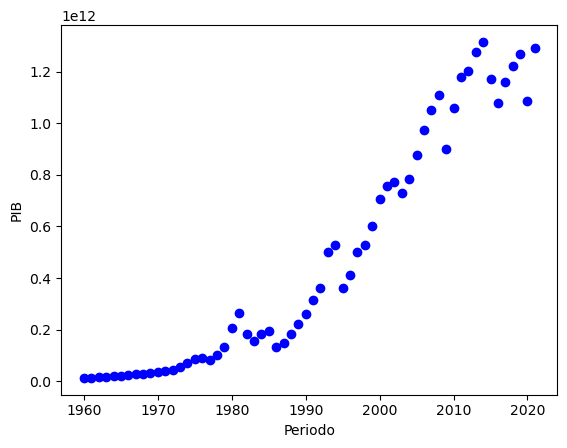

In [16]:
plt.scatter(df.Periodo, df.GDP, color= 'blue')
plt.xlabel('Periodo')
plt.ylabel('PIB')
plt.show()


    X representa el período (año) y Y el PIB. De lo anterior es evidente que debe estimar dos parámetros (Beta1 y Beta2 ).

### Ahora que notamos que nuestros datos si tienen una señal de que cada vez que pasan los años aumenta el PIB pero que tienen un limite estamos hablando de una funcion logaritmica

#### Que debemos hacer para empezar a desarrollar nuestro modelo?
    
    Separamos por "mascaras para entrenar nuestro modelo"

In [100]:
# Dividimos en entrenamiento y prueba
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]


## Usar funcion logistica

In [126]:
def logistic(x, beta1, beta2):
    return 1 / (1 + np.exp(beta1 * (x - beta2)))

### Si hubo problemas

    Al usar datos tan grandes Python no puede manejar estos numeros asi, entonces tenemos que normalizarlos y limitarlos

    Ahora la curva logística, que solo produce valores entre 0 y 1, se comporta correctamente con los datos reales.

In [106]:
# Normalizamos los datos
pib_train_norm = train.GDP / max(df.GDP)
pib_test_norm = test.GDP / max(df.GDP)

### El inicio de la pendiente suave
    Esto para  darle al optimizador una mejor pista inicial, y que inicie suave junto con la media del periodo
    

In [108]:
# Ajustamos el modelo con valores iniciales
p0 = [0.1, np.median(df.Periodo)]
popt, pcov = curve_fit(logistic, train.Periodo, pib_train_norm, p0=p0, maxfev=10000)
beta1, beta2 = popt

### Creando predicciones
     Aplica el modelo logístico ajustado a los años del conjunto de prueba para obtener las predicciones de PIB.

     Donde R2 es la precision del modelo siendo 1.0 el 100%

In [136]:
y_pred_test = logistic(test.Periodo, beta1, beta2)
r2_test = r2_score(pib_test_norm, y_pred_test)
print(f"R2 Score en datos de prueba: {r2_test:.2f}")

R2 Score en datos de prueba: 0.98


### Creando el grafico que prueba datos de test y train

    Creamos un grafico para representar los valores de entrenamiento, prueba y el modelo para ver que tan acertado fue

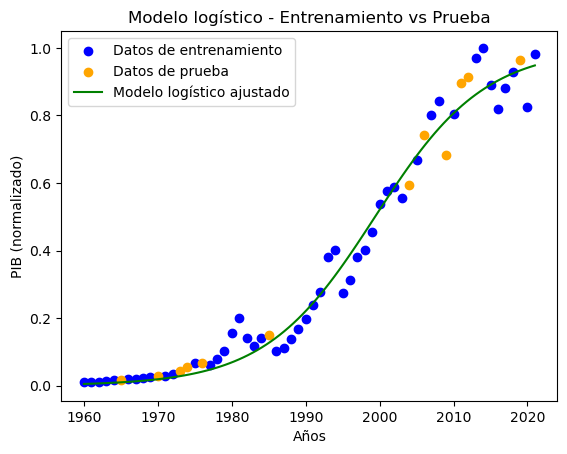

In [118]:
# Visualizacion del resultado

plt.scatter(train.Periodo, pib_train_norm, color='blue', label='Datos de entrenamiento')
plt.scatter(test.Periodo, pib_test_norm, color='orange', label='Datos de prueba')
x_range = np.linspace(min(df.Periodo), max(df.Periodo), 100)
plt.plot(x_range, logistic(x_range, beta1, beta2), color='green', label='Modelo logístico ajustado')
plt.legend()
plt.xlabel('Años')
plt.ylabel('PIB (normalizado)')
plt.title('Modelo logístico - Entrenamiento vs Prueba')
plt.show()

### Crear la prediccion del pib del 2022 al 2027


In [149]:
#Crea una nueva lista de años que incluya los futuros
periodos_futuros = np.arange(max(df.Periodo) + 1, max(df.Periodo) + 7)

#Usa el modelo ajustado para predecir
prediccion_futura = logistic(periodos_futuros, beta1, beta2) * max(df.GDP)

#Muestra las predicciones
for año, pib in zip(periodos_futuros, prediccion_futura):
    print(f"Predicción para {año}: {pib:.2f}")

Predicción para 2022: 1255334744803.18
Predicción para 2023: 1262580718210.20
Predicción para 2024: 1268984175123.10
Predicción para 2025: 1274635659116.90
Predicción para 2026: 1279617703986.17
Predicción para 2027: 1284005126170.38
